<a href="https://colab.research.google.com/github/sammainahkinya1404/Machine-Learning/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Loading Importatant Libraries
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
# Load Airpassenger dataset 
data=pd.read_csv("/content/AirPassengers.csv")
data.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
# Descibe  Structure of the dataset
data.describe()


,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
# Descibe  Structure of the dataset(shape)
data.shape

(144, 2)

In [ ]:
# Descibe  Structure of the dataset(dimensions)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        144 non-null    object 
 1   #Passengers  144 non-null    int64  
 2   MA_5         140 non-null    float64
 3   MA_10        135 non-null    float64
 4   MA_15        130 non-null    float64
 5   Lag_1        143 non-null    float64
 6   Lag_2        142 non-null    float64
 7   Lag_3        141 non-null    float64
 8   Lag_4        140 non-null    float64
 9   Lag_5        139 non-null    float64
 10  Lag_6        138 non-null    float64
 11  Lag_7        137 non-null    float64
 12  Lag_8        136 non-null    float64
 13  Lag_9        135 non-null    float64
 14  Lag_10       134 non-null    float64
dtypes: float64(13), int64(1), object(1)
memory usage: 17.0+ KB


In [ ]:
# Data Pre-processing(Handling-missing Values)
data.isnull().sum()

Month           0
#Passengers     0
MA_5            4
MA_10           9
MA_15          14
Lag_1           1
Lag_2           2
Lag_3           3
Lag_4           4
Lag_5           5
Lag_6           6
Lag_7           7
Lag_8           8
Lag_9           9
Lag_10         10
dtype: int64

In [ ]:
# # Data Pre-processing(Handling duplicated Values)
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
139    False
140    False
141    False
142    False
143    False
Length: 144, dtype: bool

In [ ]:
# Convert the Month column to numerical representation
data['Month'] = pd.to_datetime(data['Month']).dt.month

In [ ]:
# Linear Regression
# 
# a. Perform linear regression on the dataset, using the order of the data as the independent variable.
# Define Independent and dependent variables 
# Dependent Variable(Passengers)
y=data['#Passengers'].values
# Independent  Variable(order of the dataset)
X=data['Month'].values.reshape(-1,1)


In [ ]:
#Initialize an instance of the LinearRegression Model
model1=LinearRegression()

In [ ]:
# Train the model using Independent variable(Month) and Dependent variable (#Passenges)
model1.fit(X,y)

LinearRegression()

In [ ]:
# Use the Trained model to predict X
predictor=model1.predict(X)

In [ ]:
# Obtain Model  intercept and coefficient
intercept = model1.intercept_
coefficient = model1.coef_[0]



In [ ]:
print("Linear Regression Equation: y =", coefficient, "* x +", intercept)


Linear Regression Equation: y = 2.2042540792540777 * x + 265.9709595959596


In [ ]:
# b. Split the dataset into training and testing sets:
# Split the dataset into training and testing sets (85% training, 15% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
# c. Train the linear regression model on the training set.
model1.fit(X_train,y_train)

LinearRegression()

In [ ]:
# d. Evaluate the model's performance by calculating the R-squared and RMSE on the testing set.
# Make predictions on the testing set
y_pred = model1.predict(X_test)
print("Predicted  Values are:",y_pred)
print()
print()
# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-Squared score:",r2)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",rmse)

Predicted  Values are: [293.31140331 286.76214883 296.58603055 267.1143854  290.03677607
 263.83975816 263.83975816 280.21289435 283.48752159 283.48752159
 273.66363988 283.48752159 296.58603055 267.1143854  276.93826712
 276.93826712 273.66363988 293.31140331 280.21289435 267.1143854
 299.86065779 299.86065779]


R-Squared score: -0.05898601353968358
Root Mean Squared Error: 96.59056265955185


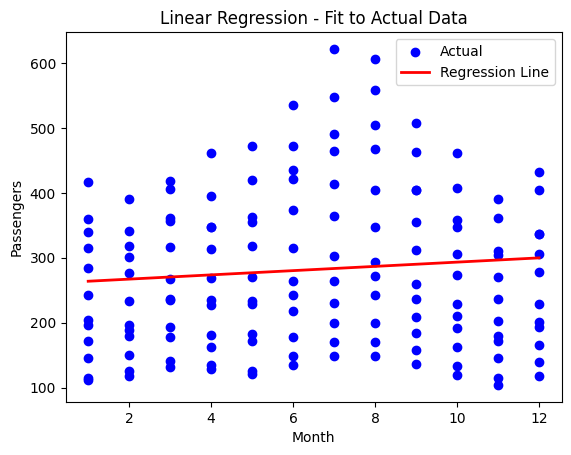

In [ ]:
# . Plot the regression line against the actual passenger numbers to visualize the model's fit.
import matplotlib.pyplot as plt

# Plot the regression line
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, model1.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Linear Regression - Fit to Actual Data')
plt.legend()
plt.show()


In [ ]:
# Moving Averages (MA):
# a. Calculate moving averages for different time windows, such as MA 5, MA 10, and MA 15 months.
# Calculate Moving Averages
data['MA_5'] = data['#Passengers'].rolling(window=5).mean()
data['MA_10'] = data['#Passengers'].rolling(window=10).mean()
data['MA_15'] = data['#Passengers'].rolling(window=15).mean()


In [ ]:
# b. Perform pairwise correlation analysis between each moving average and the passenger numbers variable.
correlation_matrix = data[['MA_5', 'MA_10', 'MA_15', '#Passengers']].corr()


In [ ]:
# c. Interpret the correlation results to assess the relationship between moving averages and passenger numbers.
print(correlation_matrix)



                 MA_5     MA_10     MA_15  #Passengers
MA_5         1.000000  0.972356  0.976944     0.935544
MA_10        0.972356  1.000000  0.994469     0.906012
MA_15        0.976944  0.994469  1.000000     0.932025
#Passengers  0.935544  0.906012  0.932025     1.000000


In [ ]:
# Lagged Variables:
# a. Create lagged variables by shifting the passenger number values by 1 to 10 time periods.
# Create lagged variables
for lag in range(1, 11):
    data[f'Lag_{lag}'] = data['#Passengers'].shift(lag)


In [ ]:

# b. Perform pairwise correlation analysis between each lagged variable and the passenger numbers variable.
correlation_matrix = data.iloc[:, -11:].corrwith(data['#Passengers'])

# c. Analyze the correlation results to understand the relationship between lagged variables and passenger numbers.

print(correlation_matrix)


MA_15     0.932025
Lag_1     0.960195
Lag_2     0.895675
Lag_3     0.837395
Lag_4     0.797735
Lag_5     0.785943
Lag_6     0.783919
Lag_7     0.784592
Lag_8     0.792215
Lag_9     0.827852
Lag_10    0.882713
dtype: float64


In [ ]:
# Model Optimization
# a. Combine the significant moving averages and lagged variables from steps 3 and 4 to form different parameter combinations.
# Select the significant moving averages and lagged variables
significant_features = ['MA_5', 'MA_10', 'Lag_1', 'Lag_2', 'Lag_5']

# Create a new DataFrame with the selected features
df_selected = data[significant_features]

In [ ]:


# b. Train and evaluate linear regression models using each parameter combination.
# Iterate over different parameter combinations
for params in significant_features:
    X = df_selected[params].values.reshape(-1, 1)  # Reshape X to a 2D array
    y = data['#Passengers'].values.reshape(-1, 1)  # Reshape y to a 2D array

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Update best parameters if current model has better performance
    if rmse < best_rmse and r2 > best_r2:
        best_rmse = rmse
        best_r2 = r2
        best_params = params


In [ ]:
# # c. Select the parameter combination that yields the best performance in terms of RMSE and R-squared.
# print("Best Parameter Combination:", best_params)
# print("Best RMSE:", best_rmse)
# print("Best R-squared:", best_r2)


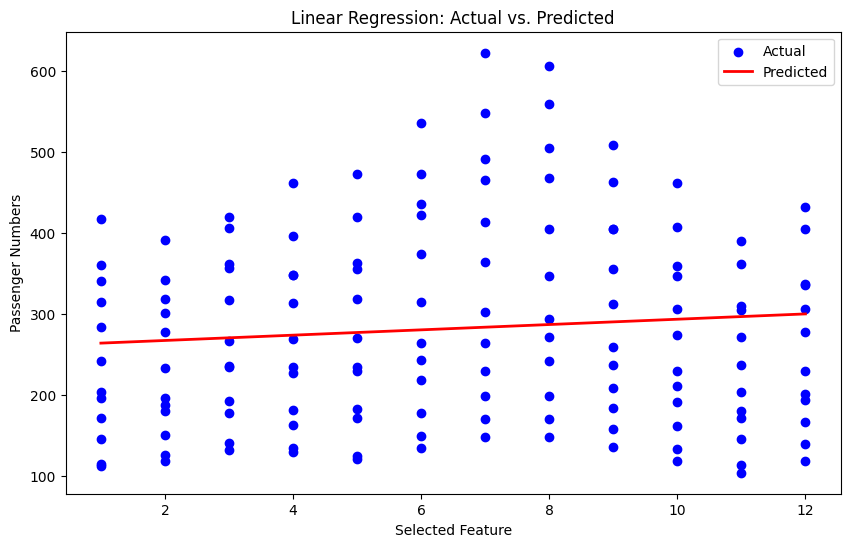

In [ ]:
# a. Use the selected best model to make predictions on unseen data
X_selected = data['Month'].values.reshape(-1, 1)  # Reshape X_selected to a 2D array

# Make predictions on unseen data
y_pred = model1.predict(X_selected)

# b. Plot the best model's predictions against the actual passenger numbers
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_selected, y, color='blue', label='Actual')
plt.plot(X_selected, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Selected Feature')
plt.ylabel('Passenger Numbers')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()


In a time series forecasting environment, a model is considered to be overfitting if it becomes overly complicated and starts to replicate the noise or random fluctuations in the training data rather than capturing the underlying patterns or trends. Time series data commonly display seasonal, trending, and cyclical patterns. These patterns and the data noise are both captured by an overfit model, which leads to poor generalization and inaccurate predictions on yet-to-be-observed data. Overfitting in time series forecasting can be particularly problematic due to the model's potential for performing well on training data but failing to transfer to fresh data points.

b. One way to identify overfitting is to compare the performance metrics on the training and testing datasets. If the model performs considerably better on training data compared to testing data, overfitting may be present. Some common performance metrics to consider include RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), or R-squared. If the model shows significantly lower error or higher R-squared on training data than on testing data, the model might be overfitted.

c. Methods to avoid overfitting in time series forecasting include:

Cross-validation: This method, as opposed to using a single train-test split, involves producing several folds of the data and training the model on various combinations of these folds. By evaluating the model's performance across several validation sets, cross-validation provides a more precise approximation of the model's generalization performance.

Techniques for regularization: Regularization introduces a penalty term to the loss function to deter the use of complex models. Methods like Ridge Regression or Lasso Regression can help reduce overfitting by lowering the coefficients of less important features or by putting a limit on the magnitude of the coefficients.

Feature selection: To reduce the risk of overfitting, carefully pick relevant features rather than using all of the options. Expertise in the relevant domain and exploratory data analysis can be used to direct the selection of features that are most likely to represent the underlying patterns in the data.

Since simpler models may occasionally be more dependable and less prone to overfitting, they should be taken into account. Since overly complex models can overfit the data and produce unnecessary noise, model complexity and performance must be balanced.

Regular validation and monitoring: Overfitting can be found by keeping an eye on the model's performance on fresh data and contrasting forecasts with the final outcomes. If the model performs poorly when used with unseen data, it may be an indication of overfitting. In this situation, model adjustments or data pretreatment may be necessary.

Overall, careful feature selection, the right level of model complexity, and validation techniques help reduce overfitting in time series forecasting.
